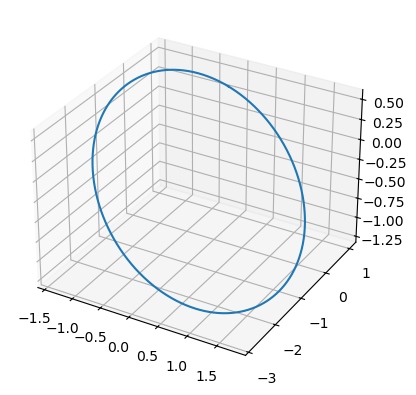

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton
from mpl_toolkits.mplot3d import Axes3D

# Constants
G = 1.32712440018e11  # Solar gravitational constant (km^3/s^2)

def kepler_eq(E, M, e):
    return E - e * np.sin(E) - M

def true_anomaly(E, e):
    return 2 * np.arctan2(np.sqrt(1+e)*np.sin(E/2), np.sqrt(1-e)*np.cos(E/2))

def orbit_positions(e, a, i, w, Omega, TP, num_points=1000):
    i = np.radians(i)
    w = np.radians(w)
    Omega = np.radians(Omega)
    
    # Generate mean anomalies over one period
    M_vals = np.linspace(0, 2*np.pi, num_points)
    positions = []

    for M in M_vals:
        E = newton(kepler_eq, M, args=(M, e))
        nu = true_anomaly(E, e)
        r = a * (1 - e**2) / (1 + e * np.cos(nu))
        
        # Position in orbital plane
        x_orb = r * np.cos(nu)
        y_orb = r * np.sin(nu)
        z_orb = 0
        
        # Rotate to 3D space
        x = r * (np.cos(Omega) * np.cos(w + nu) - np.sin(Omega) * np.sin(w + nu) * np.cos(i))
        y = r * (np.sin(Omega) * np.cos(w + nu) + np.cos(Omega) * np.sin(w + nu) * np.cos(i))
        z = r * (np.sin(w + nu) * np.sin(i))
        positions.append([x, y, z])
    
    return np.array(positions)

# Example usage (with dummy data)
positions = orbit_positions(e=0.5, a=2.0, i=30, w=45, Omega=60, TP=2459200)

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(positions[:,0], positions[:,1], positions[:,2])
plt.show()